Mount Drive

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Import Libraries

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import missingno as msno
from nltk.sentiment import SentimentIntensityAnalyzer
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.cluster import KMeans
import nltk
import warnings

warnings.filterwarnings("ignore")
pd.options.display.max_columns = None
nltk.download('vader_lexicon')


[nltk_data] Downloading package vader_lexicon to /root/nltk_data...


True

Load Excel Data from SMEV File

In [2]:
ev_raw_data = pd.read_excel("/content/drive/MyDrive/EV SEG/ev_registration_data_2017_2023.xlsx", sheet_name=None)
list(ev_raw_data.keys())


['EV 2W FY 19-20',
 'EV 2W FY 20-21',
 'EV 2W FY 21-22',
 'EV 2W FY 22-23',
 'EV Market',
 'Electric Bus Sales',
 'Electric 4-Wheeler Sales',
 'Electric 3-Wheeler Sales',
 'Electric 2-Wheeler Sales',
 'EV Industries']

In [4]:
ev_raw_data

{'EV 2W FY 19-20':    financial_year          maker  market_share month  num_vehicles
 0         2019-20  Hero Electric          0.30   Apr          1776
 1         2019-20  Hero Electric          0.30   May           455
 2         2019-20  Hero Electric          0.30   Jun           329
 3         2019-20  Hero Electric          0.30   Jul           260
 4         2019-20  Hero Electric          0.30   Aug           249
 ..            ...            ...           ...   ...           ...
 67        2019-20         Others          0.08   Nov           187
 68        2019-20         Others          0.08   Dec            81
 69        2019-20         Others          0.08   Jan           129
 70        2019-20         Others          0.08   Feb           204
 71        2019-20         Others          0.08   Mar           288
 
 [72 rows x 5 columns],
 'EV 2W FY 20-21':     financial_year          maker  market_share month  num_vehicles
 0          2020-21  Hero Electric          0.36   Ap

EV Industry Growth

In [10]:
industry_df = ev_raw_data['EV Industries']

In [11]:
industry_df

,category,financial_year,num_vehicles
0,E-2 Wheelers,2017-18,1981
1,E-2 Wheelers,2018-19,27478
2,E-2 Wheelers,2019-20,26512
3,E-2 Wheelers,2020-21,44294
4,E-2 Wheelers,2021-22,249615
5,E-2 Wheelers,2022-23,728090
6,E-3 Wheelers,2017-18,91970
7,E-3 Wheelers,2018-19,116031
8,E-3 Wheelers,2019-20,143051
9,E-3 Wheelers,2020-21,90898


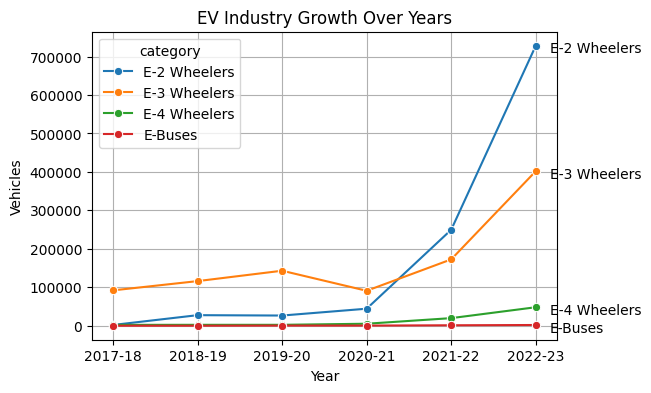

In [6]:
plt.figure(figsize=(6, 4))
sns.lineplot(data=industry_df, x='financial_year', y='num_vehicles', hue='category', marker='o')
for cat in industry_df['category'].unique():
    point = industry_df[industry_df['category'] == cat].iloc[-1]
    plt.annotate(cat, (point['financial_year'], point['num_vehicles']), xytext=(10, -5), textcoords="offset points")
plt.title("EV Industry Growth Over Years")
plt.xlabel("Year")
plt.ylabel("Vehicles")
plt.grid(True)
plt.show()


EV Market Bar Plot

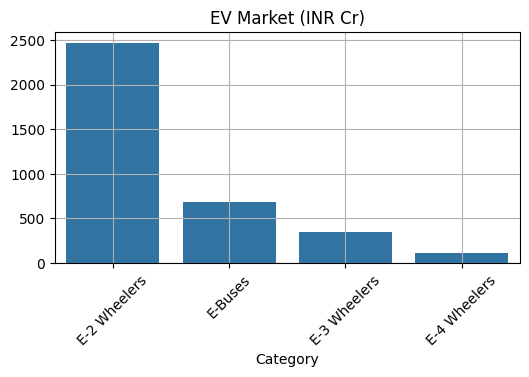

In [7]:
market_df = ev_raw_data['EV Market'].sort_values('Amount INR Cr', ascending=False)

plt.figure(figsize=(6, 3))
sns.barplot(market_df, x='Category', y='Amount INR Cr')
plt.title("EV Market (INR Cr)")
plt.ylabel("")
plt.xticks(rotation=45)
plt.grid(True)
plt.show()


Combine 2W Registration Data

In [8]:
keys_2w = list(ev_raw_data.keys())[:4]
reg_2w_df = pd.concat([ev_raw_data[key] for key in keys_2w])
reg_2w_df['maker'] = reg_2w_df['maker'].str.upper().replace({
    'AMPERE VEHICLES': 'AMPERE',
    'ATHER ENERGY': 'ATHER',
    'BEING INDIA': 'BENLING',
    'JITENDRA NEW EV': 'JITENDRA',
    'OKINAWA AUTOTECH': 'OKINAWA'
})


Plot Maker-Wise Growth

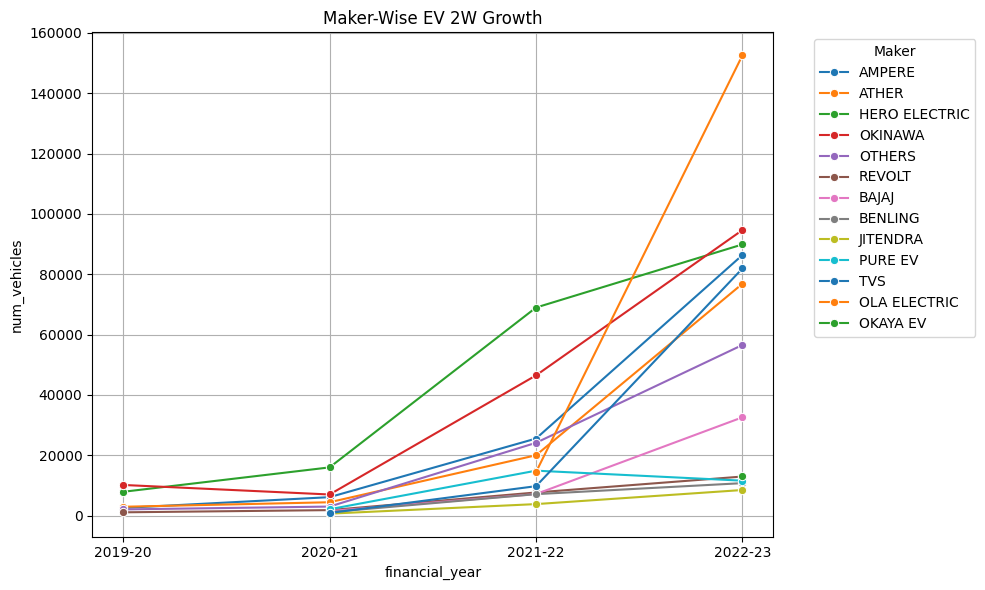

In [12]:
plt.figure(figsize=(10, 6))
sns.lineplot(data=reg_summary, x='financial_year', y='num_vehicles', hue='maker', marker='o', palette='tab10')
plt.title("Maker-Wise EV 2W Growth")
plt.grid(True)
plt.legend(title='Maker', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.tight_layout()
plt.show()


Load and Merge Reviews + Specs

In [13]:
review_df = pd.read_csv("/content/drive/MyDrive/EV SEG/ev_2w_reviews_india.csv")
specs_df = pd.read_csv("/content/drive/MyDrive/EV SEG/ev_two_wheeler_specs_india.csv")

ev_df = review_df.merge(specs_df, how='left', on='Model Name')
ev_df.head()

,review,Used it for,Owned for,Ridden for,rating,Visual Appeal,Reliability,Performance,Service Experience,Extra Features,Comfort,Maintenance cost,Value for Money,Model Name,Price,Riding Range (km),Top Speed (kmph),Weight (kg),Battery Charging Time (hrs),Rated Power (W)
0,We all checked the bike's capacity to be 150 k...,Daily Commute,Never owned,NaN,1,3.0,4.0,NaN,NaN,NaN,4.0,NaN,1.0,TVS iQube,137890,100,78,117,5,3000
1,Performance is very poor on this bike. The cha...,Everything,> 1 yr,< 5000 kms,1,3.0,1.0,NaN,1.0,NaN,3.0,NaN,3.0,TVS iQube,137890,100,78,117,5,3000
2,I purchased this in April 2022 and the sales s...,Daily Commute,< 3 months,< 5000 kms,3,4.0,4.0,NaN,2.0,NaN,5.0,NaN,2.0,TVS iQube,137890,100,78,117,5,3000
3,If any issues come in scooty parts not availab...,Daily Commute,6 months-1 yr,5000-10000 kms,1,1.0,1.0,NaN,1.0,NaN,1.0,NaN,1.0,TVS iQube,137890,100,78,117,5,3000
4,Don't buy this vehicle unless you have a near ...,Daily Commute,6 months-1 yr,< 5000 kms,1,3.0,4.0,NaN,1.0,NaN,3.0,NaN,2.0,TVS iQube,137890,100,78,117,5,3000


Visualize Missing Data

<Axes: >

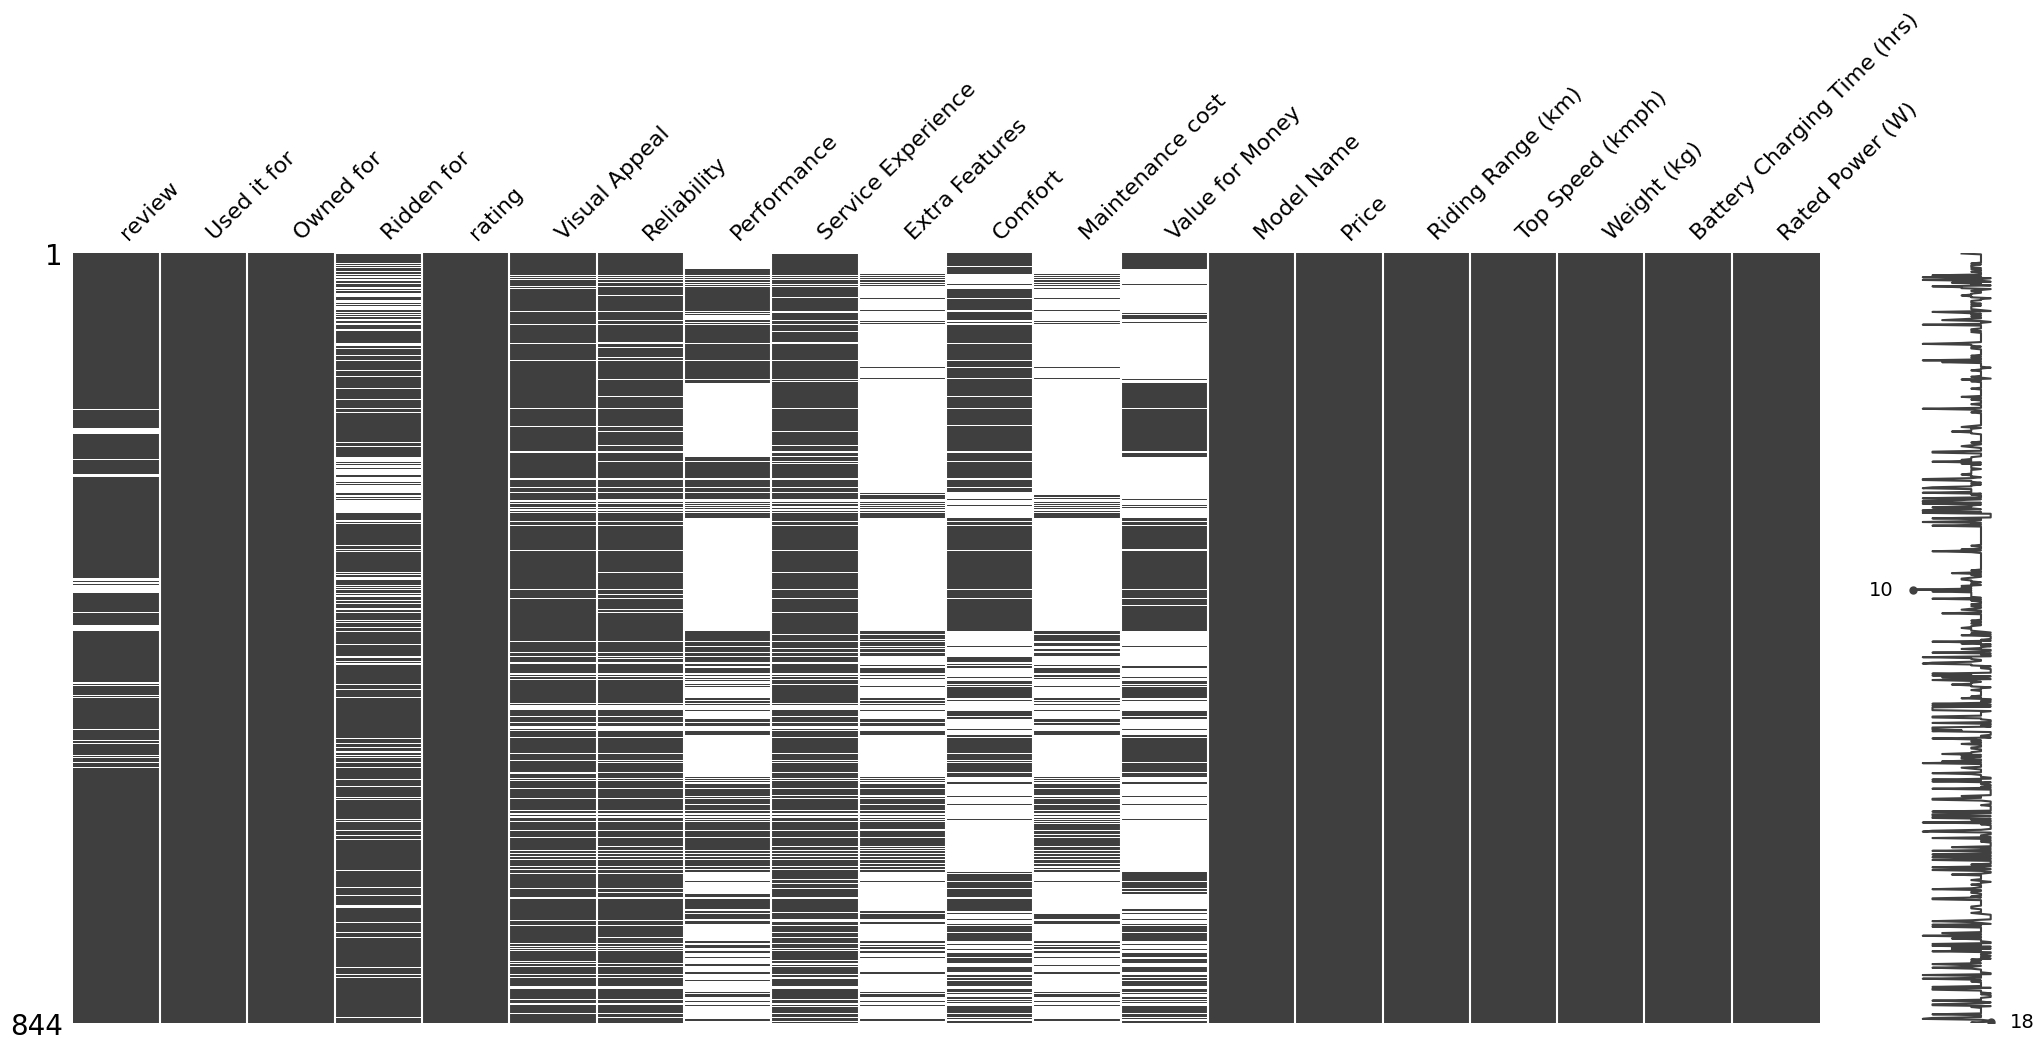

In [14]:
msno.matrix(ev_df)


Sentiment Analysis (VADER)

In [15]:
sia = SentimentIntensityAnalyzer()
sentiment_list = []

for text in ev_df['review']:
    if pd.isna(text):
        sentiment_list.append('neutral')
    else:
        score = sia.polarity_scores(text)
        sentiment_list.append('positive' if score['pos'] > score['neg'] else 'negative' if score['neg'] > score['pos'] else 'neutral')

ev_df['sentiment'] = sentiment_list
ev_df['sentiment'].value_counts()


,count
sentiment,
positive,527
negative,264
neutral,53


 Feature Selection + Preprocessing

In [16]:
features = [
    'rating', 'Visual Appeal', 'Reliability', 'Performance', 'Service Experience',
    'Extra Features', 'Comfort', 'Maintenance cost', 'Value for Money'
]

segment_df = ev_df[features].fillna(0.0)
scaler = StandardScaler()
scaled_data = scaler.fit_transform(segment_df)


PCA & Scree Plot

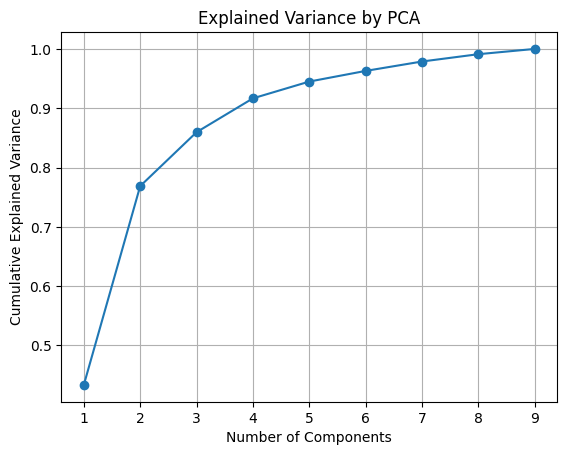

In [17]:
pca = PCA(random_state=42)
pca_data = pca.fit_transform(scaled_data)

pca_df = pd.DataFrame(pca_data, columns=[f'PC{i+1}' for i in range(len(features))])

plt.plot(range(1, len(features)+1), pca.explained_variance_ratio_.cumsum(), marker='o')
plt.xlabel('Number of Components')
plt.ylabel('Cumulative Explained Variance')
plt.title('Explained Variance by PCA')
plt.grid(True)
plt.show()


KMeans Clustering (Elbow Method)

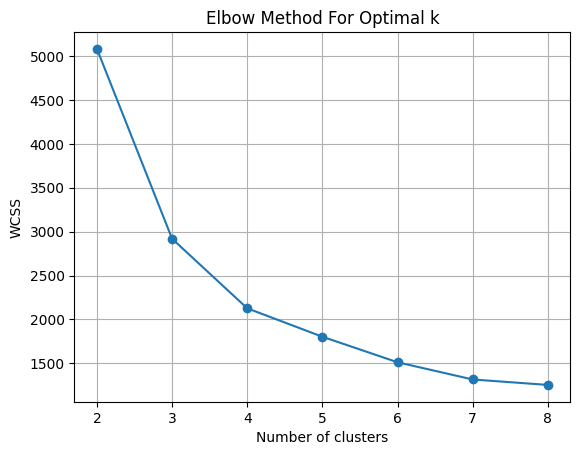

In [18]:
wcss = []
for k in range(2, 9):
    kmeans = KMeans(n_clusters=k, random_state=42)
    kmeans.fit(scaled_data)
    wcss.append(kmeans.inertia_)

plt.plot(range(2, 9), wcss, marker='o')
plt.title('Elbow Method For Optimal k')
plt.xlabel('Number of clusters')
plt.ylabel('WCSS')
plt.grid(True)
plt.show()


Apply KMeans (k=4 as Example)

In [19]:
kmeans = KMeans(n_clusters=4, random_state=42)
clusters = kmeans.fit_predict(scaled_data)

pca_df['cluster'] = clusters
segment_df['cluster'] = clusters
ev_df['cluster'] = clusters


Segment Profile Plot

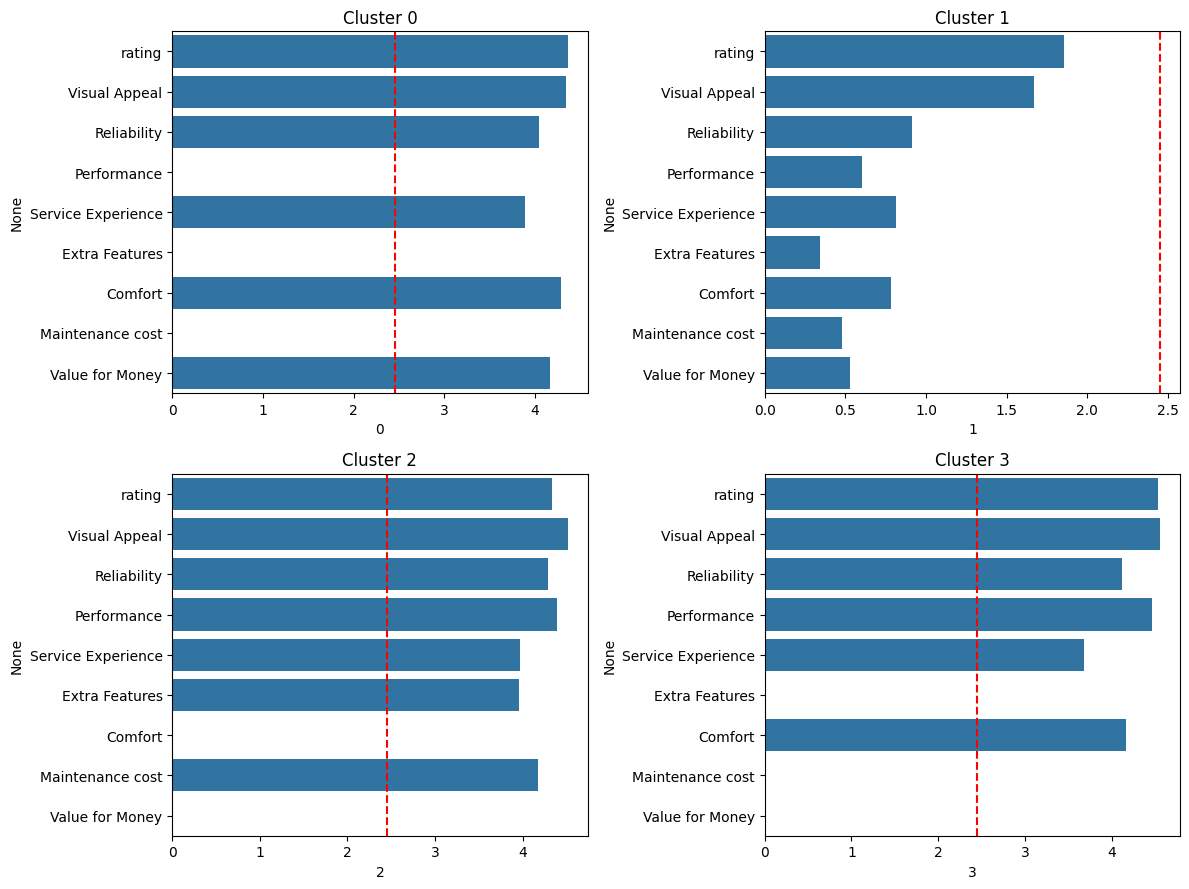

In [20]:
pivot_profile = segment_df.groupby('cluster').mean().T
avg_profile = pivot_profile.mean(axis=1)

plt.figure(figsize=(12, 9))
for i in range(4):
    plt.subplot(2, 2, i+1)
    sns.barplot(x=pivot_profile[i], y=pivot_profile.index)
    plt.axvline(avg_profile.mean(), color='red', linestyle='--')
    plt.title(f"Cluster {i}")
plt.tight_layout()
plt.show()


PCA Cluster Plot

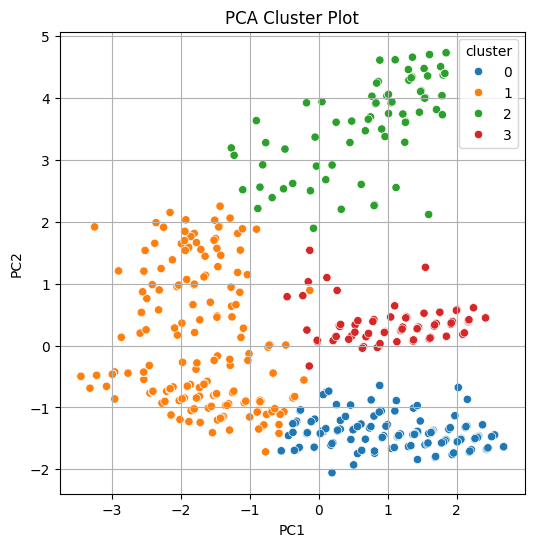

In [21]:
plt.figure(figsize=(6, 6))
sns.scatterplot(pca_df, x='PC1', y='PC2', hue='cluster', palette='tab10')
plt.title("PCA Cluster Plot")
plt.grid(True)
plt.show()


Mosaic & Box Plots for Cluster Analysis

In [22]:
def mosaicplot(df, colors, title):
    p_ratio = df.div(df.sum(1), axis=0).cumsum(axis=1)
    x = [str(i) for i in df.index]

    for col, color in zip(p_ratio.columns[::-1], colors):
        plt.bar(x, p_ratio[col], color=color, edgecolor='white', label=col)
    plt.legend(loc='upper left', bbox_to_anchor=(1, 1))
    plt.title(title)
    plt.show()


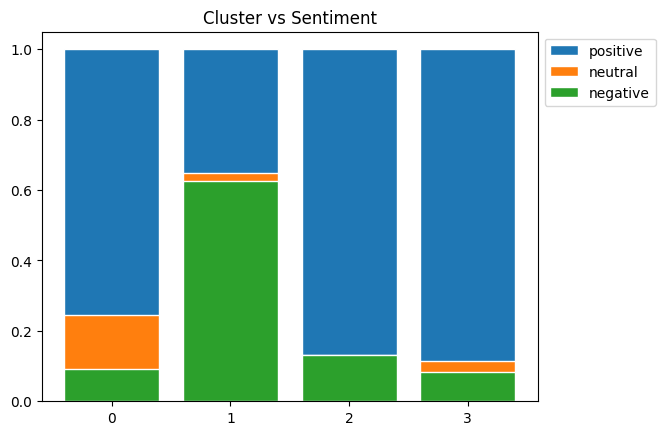

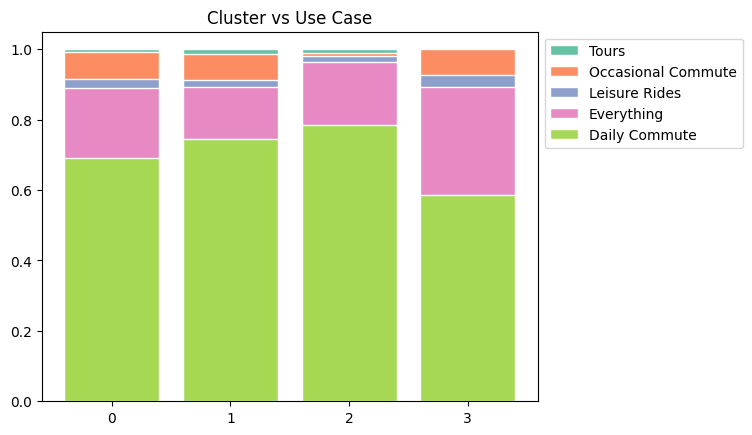

In [23]:
sentiment_cluster = pd.crosstab(ev_df['cluster'], ev_df['sentiment'])
mosaicplot(sentiment_cluster, ['#1F77B4', '#FF7F0E', '#2CA02C'], "Cluster vs Sentiment")

used_cluster = pd.crosstab(ev_df['cluster'], ev_df['Used it for'])
mosaicplot(used_cluster, sns.color_palette("Set2", n_colors=used_cluster.shape[1]), "Cluster vs Use Case")


Final Ratings by Cluster

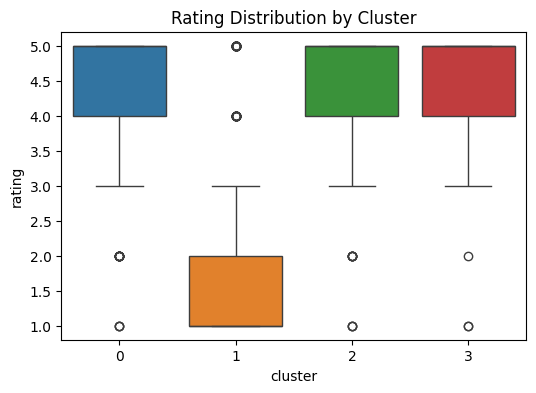

In [24]:
plt.figure(figsize=(6, 4))
sns.boxplot(data=ev_df, x='cluster', y='rating', palette='tab10')
plt.title("Rating Distribution by Cluster")
plt.show()
